In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

In [27]:
# read the data
data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Apziva\\Project\\term-deposit-marketing\\term-deposit-marketing-2020.csv')

In [28]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [29]:
data.shape

(40000, 14)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [31]:
# check missing data
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [32]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


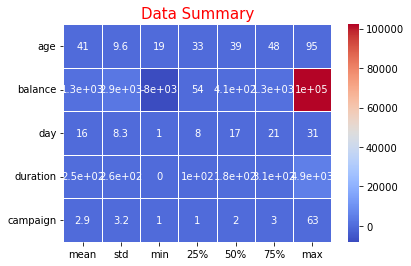

In [33]:
# show data summary，this gragh fits for numerical variables. It summarize the numerical variables statistic. 
sns.heatmap(data.describe()[1:].transpose(),annot=True,linewidths=.5,linecolor="white",cmap="coolwarm")
plt.title("Data Summary",fontsize=(15),color="red")
plt.show()

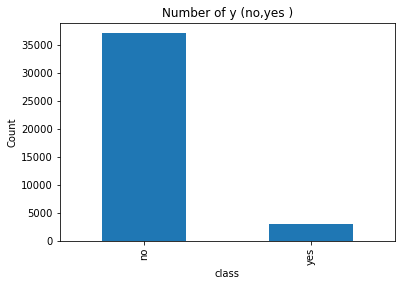

In [34]:
# check data balanced,yes class is much more far to no class, the data label is imbalance
plt.figure()
pd.Series(data['y']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of y (no,yes )');

# Data Exploration

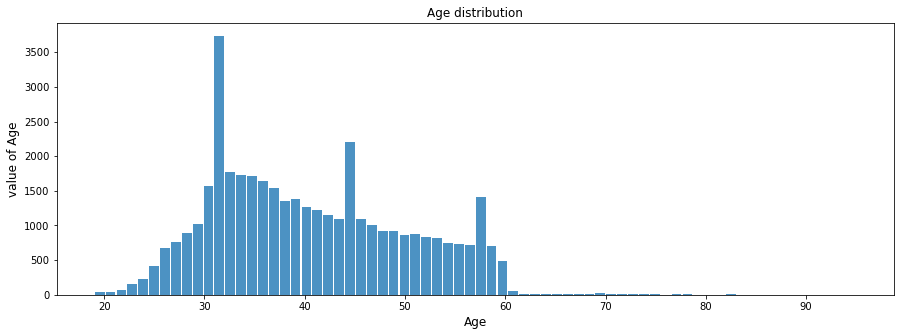

In [35]:
# observe age variable distribution,the age distribution is nearly normal distribution, and the high value approxmately lands on 31,few of 
# age like around 20, above 60
plt.figure(figsize=(15,5))
plt.hist(data.age,bins=70,alpha=0.8,rwidth=0.9)
plt.title("Age distribution")
plt.ylabel('value of Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
 
plt.show()

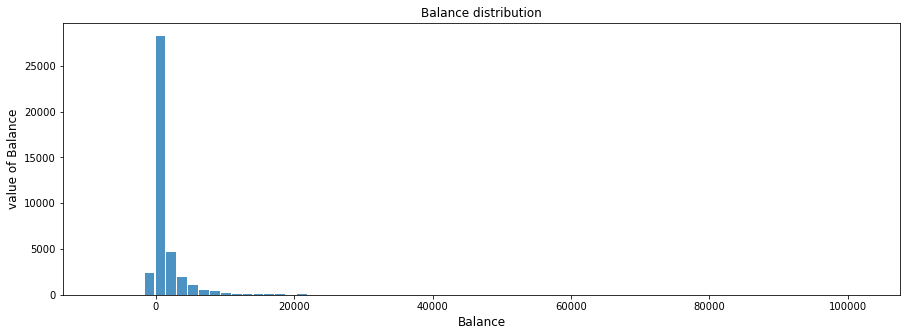

In [36]:
# observe balance variable distribution, about 2500 has negtive balance, the most high value balance is 2000,there is few data of balance 
# over 8000 
plt.figure(figsize=(15,5))
plt.hist(data.balance,bins=70,alpha=0.8,rwidth=0.9)
plt.title("Balance distribution")
plt.ylabel('value of Balance', fontsize=12)
plt.xlabel('Balance', fontsize=12)
 
plt.show()

D:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


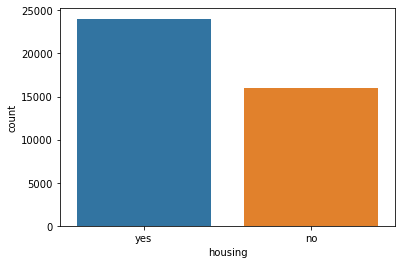

In [37]:
# observe housing variable distribution the number of cutomers has house and has no house is almost balance
sns.countplot(data.housing)
plt.show()

D:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


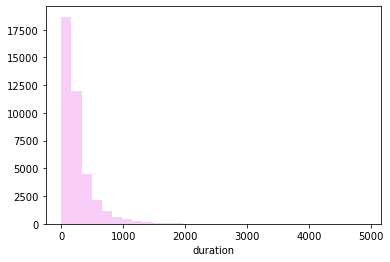

In [38]:
# observe duration variable distribution, the number of duaration has the large distrition on <500, and few of them lies on over 1000
sns.distplot(data["duration"],kde=False,bins=30,color="violet")
plt.show()

In [49]:
# let us explore pivot table of the data
table = pd.pivot_table(data,index=['job','housing'],columns=['marital'],values=['balance','duration'],aggfunc={'balance':np.sum,'duration':np.median})

In [50]:
table

balance                   duration               
marital               divorced  married   single divorced married single
job           housing                                                   
admin         no        206950  1184276   533562    169.0   156.0  171.0
              yes       356763  1620302   903000    181.0   172.0  181.0
blue-collar   no        189115  2355164   578187    192.0   164.0  197.0
              yes       368000  5022397  1403121    184.5   190.0  196.0
entrepreneur  no        104576   768066    74551    150.0   176.0  189.0
              yes        77108   875259   140810    192.0   172.0  199.0
housemaid     no        203897   675999   127218    127.0   161.0  149.0
              yes        46949   297390    91167    198.0   161.0  184.0
management    no        663367  4366503  1858059    148.0   157.0  160.0
              yes       886537  3856224  2153950    168.0   168.0  177.5
retired       no        169017  1406471    97457    203.0   166.5  136.0
              yes       101461   379217    21577    194.0   178.5  137.0
self-employed no         75768   799718   252040    253.5   163.0  174.0
              yes       127220   632566   252790    181.0   175.0  210.0
services      no        156508   769230   237188    174.0   171.0  198.5
              yes       291440  1652411   716035    184.0   182.0  196.0
student       no           522    13856   391970    100.0   106.0  165.0
              yes         2755    19362   246850    177.0   343.0  167.0
technician    no        288757  1989498  1314701    152.0   160.0  167.0
              yes       499118  2502666  1582809    178.0   170.0  191.5
unemployed    no        135783   537903   310335    199.5   198.0  233.0
              yes        71022   405496   136931    164.0   189.5  165.0
unknown       no         16543   262790    74446    259.0   136.5  166.5
              yes        10471    23645     6292    166.0   148.0  142.0

In [14]:
# change categorial datatype using LabelEncode
from sklearn.preprocessing import LabelEncoder
data_labelencode = data['education']
data_getdummies =  data[['job','marital','default','housing','loan','contact','month']]
data_numerical = data[['age','balance','day','duration','campaign']]

le = LabelEncoder()
data['education'] = le.fit_transform(data['education'].values)
data['y'] = le.fit_transform(data['y'].values)

In [15]:
def one_hot_encoder(df, nan_as_category = True): 
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [16]:
data_dummies,new_columns = one_hot_encoder(data_getdummies)
data_dummies

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_nan
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
39996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
# concat features data and labels
data_1 = pd.concat([data['education'],data_dummies], axis=1)
data_2 = pd.concat([data_1,data_numerical], axis=1)
data_3 = pd.concat([data_2,data['y']], axis=1)
data = data_3

In [18]:
data.head(5)

,education,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_may,month_nov,month_oct,month_nan,age,balance,day,duration,campaign,y
0,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,58,2143,5,261,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,44,29,5,151,1,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,33,2,5,76,1,0
3,3,0,1,0,0,0,0,0,0,0,...,1,0,0,0,47,1506,5,92,1,0
4,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,33,1,5,198,1,0


# Feature Selection

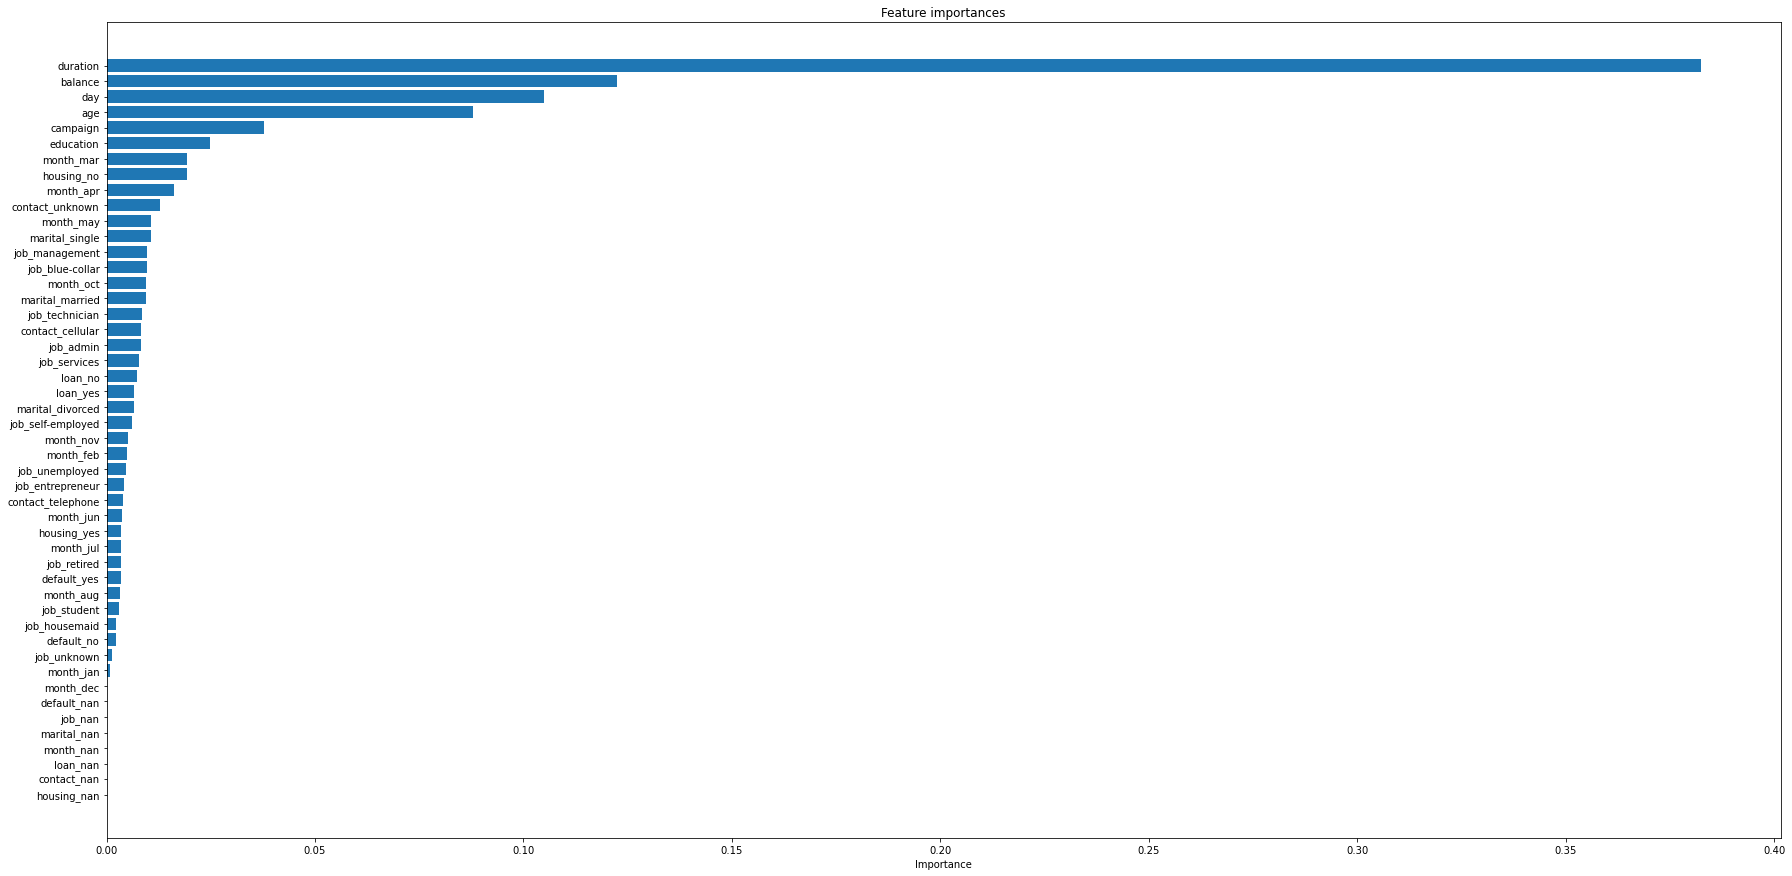

In [19]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
y = data['y']
data.drop('y', axis=1, inplace = True)
clf = DecisionTreeClassifier()
clf = clf.fit(data,y)
features_list = data.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(30,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()


In [20]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem
from imblearn.over_sampling import SMOTE
X_balance,Y_balance = SMOTE().fit_resample(data,y)
X_balance = pd.DataFrame(X_balance, columns = data.columns)

# Xgboost

In [21]:
# Train Model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score
x_train, x_test, y_train, y_test = train_test_split( X_balance,Y_balance, test_size=0.3, random_state=26)
scoring = 'roc_auc'
kfold = StratifiedKFold(n_splits=5, shuffle=True , random_state = 47)
model=XGBClassifier(n_estimators=200,max_depth=3,learning_rate=0.15, subsample=0.5)
cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
cv_results

array([0.99563704, 0.99527191, 0.99594718, 0.99490397, 0.9957068 ])

In [22]:
# Test Model
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('XGBoost Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predict)))
print('\nXGBoost Classifier Precision: {:.3f}'.format(precision_score (y_test, y_predict)))
print('\nXGBoost Classifier Recall: {:.3f}'.format(recall_score (y_test, y_predict)))

XGBoost Classifier Accuracy: 0.964

XGBoost Classifier Precision: 0.967

XGBoost Classifier Recall: 0.960


# Lightgbm

In [24]:
# Train Model
import lightgbm as lgb
model=lgb.LGBMClassifier()
cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
cv_results

array([0.9962264 , 0.99573014, 0.99649911, 0.99552368, 0.9962064 ])

In [25]:
# Test Model
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('lightgbm Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predict)))
print('\n lightgbm Classifier Precision: {:.3f}'.format(precision_score (y_test, y_predict)))
print('\n lightgbm Classifier Recall: {:.3f}'.format(recall_score (y_test, y_predict)))

lightgbm Classifier Accuracy: 0.965

 lightgbm Classifier Precision: 0.969

 lightgbm Classifier Recall: 0.961
